### Training

### cycle 1

In [71]:
loss_hist = trn_epoches(1000, md0,loss_fn, train_dataloader,optimizer)


epoch      0/  1000, loss: 0.848422

epoch    200/  1000, loss: 0.270695

epoch    400/  1000, loss: 0.131978

epoch    600/  1000, loss: 0.097693

epoch    800/  1000, loss: 0.098435


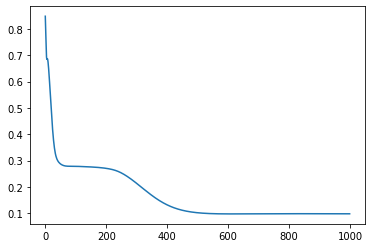

In [72]:
plt.plot(loss_hist)

In [77]:
pred_train = test_loop(md0, train_x, train_y, loss_fn)

loss: 0.234949 



Pred vs y, train data (normalized)

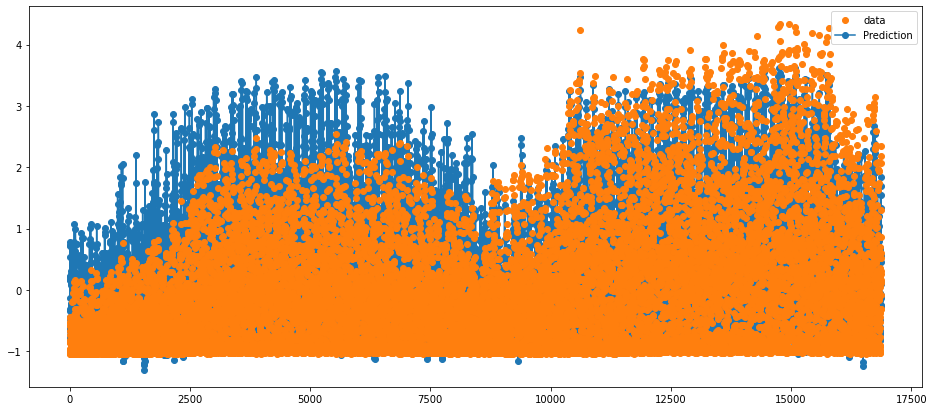

In [78]:
plt.figure(figsize = (16, 7))
#x_data = df_inp_test.reset_index()['index']
pred_data = pred_train.numpy()
tgt_data = train_y.numpy()
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(tgt_data, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

#### train cycle 2

In [79]:
loss_hist_2 = trn_epoches(1000, md0,loss_fn, train_dataloader,optimizer)


epoch      0/  1000, loss: 0.098126

epoch    200/  1000, loss: 0.097160

epoch    400/  1000, loss: 0.095890

epoch    600/  1000, loss: 0.094509

epoch    800/  1000, loss: 0.093154


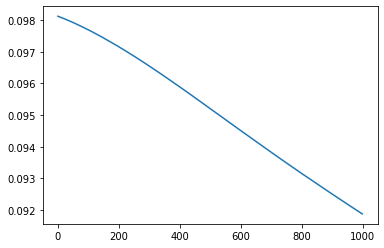

In [80]:
plt.plot(loss_hist_2)

In [81]:
pred_train_2 = test_loop(md0, train_x, train_y, loss_fn)

loss: 0.230061 



In [88]:
tgt_data_train = train_y.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]

In [90]:
tgt_data_test = df1['cnt'][-21*24:].values

pred ns y, train data

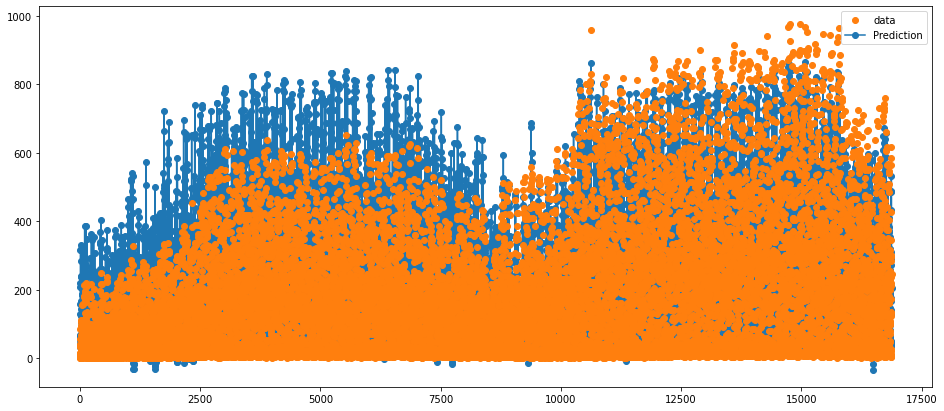

In [361]:
plt.figure(figsize = (16, 7))
#x_data = df_inp_test.reset_index()['index']
pred_data = pred_train_2.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(tgt_data_train, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [73]:
pred = test_loop(md0, test_x, test_y, loss_fn)

loss: 0.121414 



In [93]:
pred_data_test2 = pred.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]

pred ns y, test data

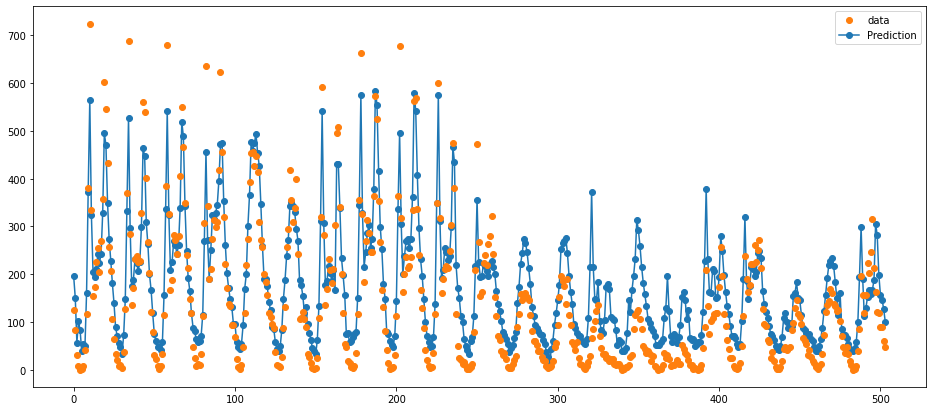

In [94]:
plt.figure(figsize = (16, 7))
#x_data = df_inp_test.reset_index()['index']
pred_plot, = plt.plot(pred_data_test2, 'o-')
cnt_plot, = plt.plot(tgt_data_test, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

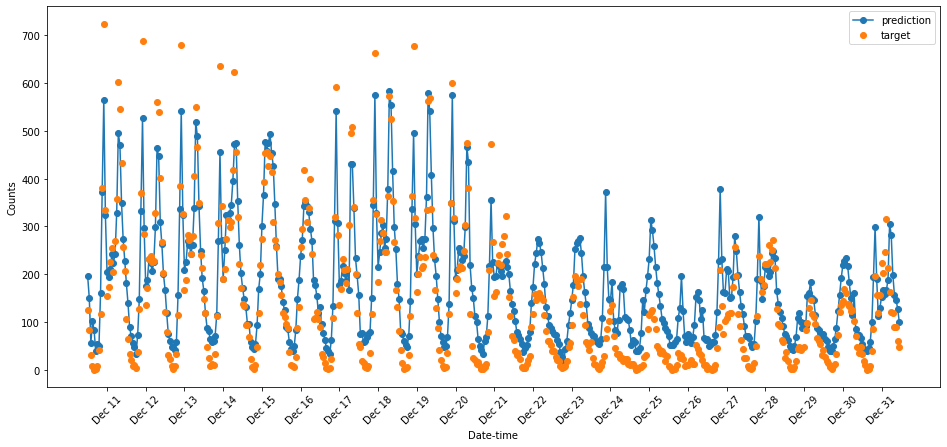

In [96]:
fig, ax = plt.subplots(figsize = (16, 7))


x_data = df_inp[-21*24:].reset_index()['index']

ax.plot(pred_data_test2, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

#### train cycle 3: longer

In [97]:
loss_hist_3 = trn_epoches(10000, md0,loss_fn, train_dataloader,optimizer)


epoch      0/ 10000, loss: 0.091867

epoch    200/ 10000, loss: 0.090632

epoch    400/ 10000, loss: 0.089437

epoch    600/ 10000, loss: 0.088296

epoch    800/ 10000, loss: 0.087225

epoch   1000/ 10000, loss: 0.086222

epoch   1200/ 10000, loss: 0.085277

epoch   1400/ 10000, loss: 0.084385

epoch   1600/ 10000, loss: 0.083550

epoch   1800/ 10000, loss: 0.082778

epoch   2000/ 10000, loss: 0.082078

epoch   2200/ 10000, loss: 0.081445

epoch   2400/ 10000, loss: 0.080877

epoch   2600/ 10000, loss: 0.080368

epoch   2800/ 10000, loss: 0.079910

epoch   3000/ 10000, loss: 0.079499

epoch   3200/ 10000, loss: 0.079130

epoch   3400/ 10000, loss: 0.078800

epoch   3600/ 10000, loss: 0.078505

epoch   3800/ 10000, loss: 0.078243

epoch   4000/ 10000, loss: 0.078013

epoch   4200/ 10000, loss: 0.077812

epoch   4400/ 10000, loss: 0.077641

epoch   4600/ 10000, loss: 0.077496

epoch   4800/ 10000, loss: 0.077378

epoch   5000/ 10000, loss: 0.077283

epoch   5200/ 10000, loss: 0.077208



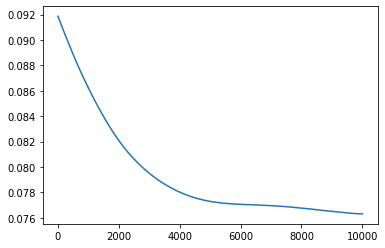

In [99]:
plt.plot(loss_hist_3)

In [100]:
pred_train_3 = test_loop(md0, train_x, train_y, loss_fn)

loss: 0.238708 



pred vs y, train data

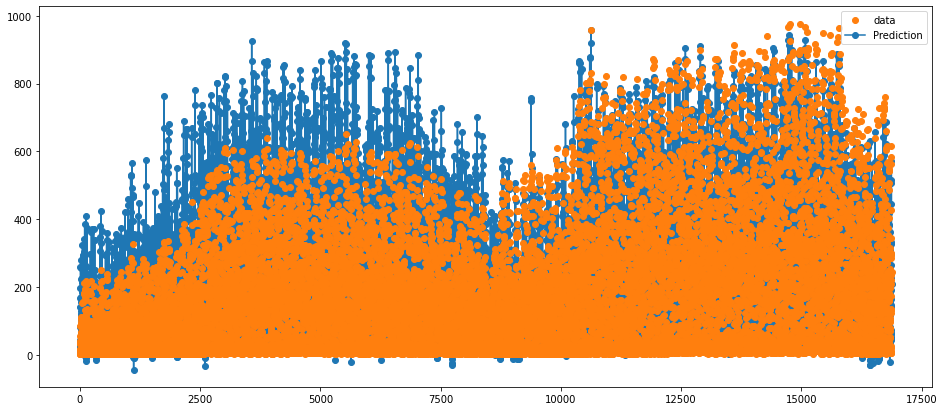

In [360]:
plt.figure(figsize = (16, 7))
pred_data = pred_train_3.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(tgt_data_train, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

the performance looks similar as that before addtional training.

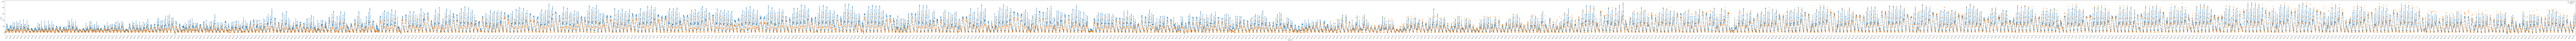

In [363]:
fig, ax = plt.subplots(figsize = (500, 7))

pred_data = pred_train_3.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]
ax.plot(pred_data, 'o-', label='prediction')
ax.plot(tgt_data_train, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[:-21*24].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.margins(x=0)
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [103]:
pred_test3 = test_loop(md0, test_x, test_y, loss_fn)

loss: 0.113562 



In [105]:
pred_data_test3 = pred_test3.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]

pred vs y, test data

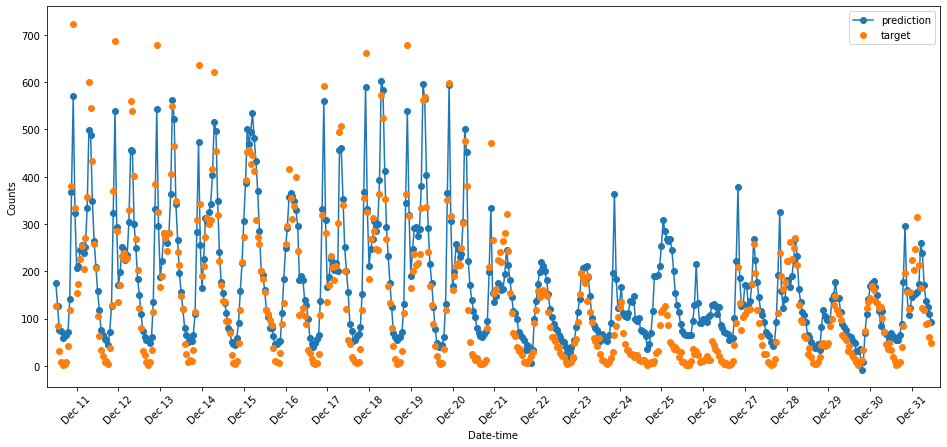

In [116]:
fig, ax = plt.subplots(figsize = (16, 7))
#x_data = df_inp[-21*24:].reset_index()['index']

ax.plot(pred_data_test3, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.margins(x=0.01)
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [125]:
torch.save(md0.state_dict(), 'md0_re_wts.pth')